## 非结构化数据分析与应用期末作业

### 选题：亚运与电竞 | XXXXXXXX——基于B站相关视频弹幕的分析

#### 0. 数据预处理

##### 0.1 数据说明

In [70]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  5 10:50:01 2021

@author: haijiao

用于拼接指定目录下所有的json文件
path后填写json文件目录
path_merges后填写拼接好的json文件存放目录
"""

import os
import json
import time

path = './SourceFile/ori/'
path_merges = './SourceFile/itgre/'
file_list = os.listdir(path)
json_list = []
data_list = []
json_data = {}
data ={}

out_time = time.strftime("%m_%d_%H_%M")

for file in file_list:
    if file.endswith(".json"):
        json_list.append(file)
print(json_list)
print(f"json文件数量：{len(json_list)}")

i = 0
for json_file in json_list:
    json_path = os.path.join(path, json_file)
    with open(json_path, 'r',encoding='utf-8') as f:
        json_data[i] = f.read()
        data[i] = json.loads(json_data[i].strip())
        data_list += list(data[i].items())
        i += 1
        print("done")

dataout = {}
for i in range(len(data_list)):
    dataout[i] = data_list[i]
    
    
json_data = json.dumps(dataout, ensure_ascii=False)

if not os.path.exists(path_merges):
    os.mkdir(path_merges)
with open(os.path.join(path_merges, f'merges_{out_time}.json'),"w",encoding='utf-8') as f1:
    f1.write(json_data)


['chaizhidao.json', 'jinghanqing.json', 'yangshikuaikan.json', 'yangshixinwen.json']
json文件数量：4
done
done
done
done


##### 0.2 import data and 分词

In [71]:
import pandas as pd 
import json
import jieba

df = pd.read_json('./SourceFile/itgre/merges_10_13_11_57.json')
strs = df.to_string()
seg_list = jieba.lcut(strs)
print(seg_list)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',

##### 0.3 数据清洗

In [83]:
with open('.\\stopwords-master\\hit_stopwords.txt',encoding='utf-8') as f:
    con = f.readlines()
    stop_words = set()
    for i in con:
        i = i.replace('\n','')
        i = i.replace(' ','')
        stop_words.add(i)
#读入停用词

result = []
for word in seg_list:
    if word not in stop_words:
        result.append(word)
        
result="".join(result)
        

import re
new_text = "".join(re.findall('[\u4e00-\u9fa5]+', result, re.S))
new_text
#去逗号



result = []
for word in jieba.lcut(new_text):
    if word not in stop_words:
        result.append(word)

##写入txt
l=result
 
f=open(".\\k.txt","w")
 
for line in l:
    f.write(line)
f.close()


##### 0.4 cloud 

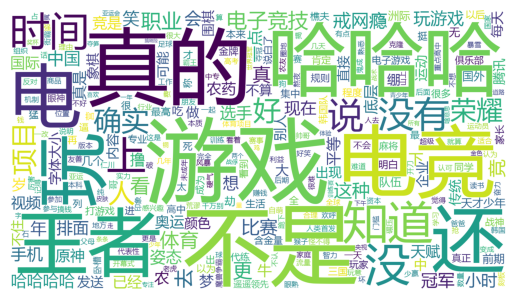

In [91]:
from collections import Counter
import numpy as np # numpy数据处理库
import jieba # 结巴分词
from wordcloud import WordCloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库
import time





"""获取文本内容"""
with open("./k.txt","r",encoding="gbk") as fp:
    content = fp.read()
words = jieba.lcut(content)

"""读取停用词"""
#with open("C:/停用词/哈工大停用词.txt","r",encoding="utf-8") as fp:
 #   stopwords = [s.rstrip() for s in fp.readlines()]
        
frequency = dict(Counter(words)) #没有去掉停用词的词频统计

font = ".\\msyh.ttf"
#mask_image = np.array(Image.open(".//pics/Esports.jpg"))

wc = WordCloud(font_path=font,
               width=1920,
               height=1080,
               max_words=300,
               #scale =,
              background_color="white",
              #mask=mask_image
              )
              #stopwords=stopwords)	#加载停用词

wc.fit_words(frequency)

plt.imshow(wc)
plt.axis("off")
plt.show()


wc.to_file(".\\词云图"+str(time.time())+".png")
